In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC

In [73]:
df = pd.read_csv('water_potability.csv')

In [74]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [75]:
df.shape

(3276, 10)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [77]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [78]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [79]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [80]:
df.fillna(df.mean(), inplace=True)

In [81]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [82]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:xlabel='ph'>

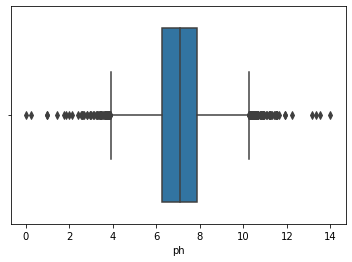

In [83]:
sns.boxplot(df['ph'])

<AxesSubplot:xlabel='Solids'>

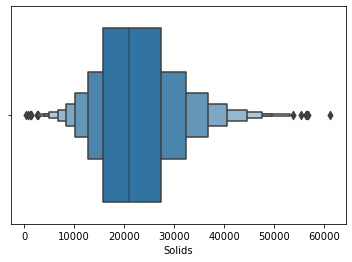

In [84]:
sns.boxenplot(df['Solids'])

In [85]:
for i in df.columns:
    for x in [i]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

    df[i].fillna(df[i].mean(), inplace=True)

In [86]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

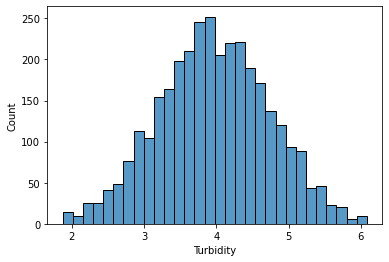

In [87]:
sns.histplot(df['Turbidity'])

<AxesSubplot:xlabel='Turbidity', ylabel='Density'>

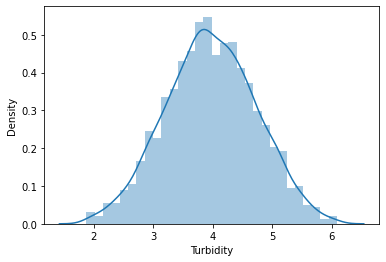

In [88]:
sns.distplot(df['Turbidity'])

## Splitting and Getting Accuracy (Training Models)

In [89]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [90]:
# Training Testing (Split Data 80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(2293, 9)
(983, 9)
(2293,)
(2293,)


In [95]:
# Decision Tree
modelDT = tree.DecisionTreeClassifier(max_depth=7)
resultDT = modelDT.fit(X_train, y_train);
prediction_test = modelDT.predict(X_test)
accuracyDT = metrics.accuracy_score(y_test, prediction_test)
# print()
print ("Model Accuracy (Decision Tree):" "\n", accuracyDT)

# Random Forest
modelRF = RandomForestClassifier(max_depth=7)
resultRF = modelRF.fit(X_train, y_train)
prediction_test = modelRF.predict(X_test)
accuracyRF = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (Random Forest):" "\n", accuracyRF)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=7)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (KNN):" "\n", accuracyKNN)

# SVM
modelSVM = SVC()
resultSVM = modelSVM.fit(X_train, y_train);
prediction_test = modelSVM.predict(X_test)
# Print the prediction accuracy
accuracySVM = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (SVM):" "\n", accuracySVM)

# LR
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# accuracyLR = accuracy_score(y_test, prediction_test)
print ("Model Accuracy (Logistic Regression): \n", accuracy_score(y_test, prediction_test))

Model Accuracy (Decision Tree):
 0.5869786368260427
Model Accuracy (Random Forest):
 0.6103763987792472
Model Accuracy (KNN):
 0.5381485249237029
Model Accuracy (SVM):
 0.5920651068158698
Model Accuracy (Logistic Regression): 
 0.5920651068158698


In [96]:
modelRF.predict([[8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771]])

array([0.])